# Midterm Exam Key - take home (50 pts)

In [86]:
import numpy as np
import scipy.stats as st
import scipy.optimize as opt
import matplotlib.pyplot as plt

---
## 1. (11 pts for a-e) You measure the arrival times of individual photons from fluorescent molecules excited by a pulsed laser (i.e. the time following laser excitation at which you detect a photon from the excited molecules). You collect many such arrival times in two different buffer conditions (buffer A and B, see data below). Does arrival time depend on the choice of buffer? Answer using a-e below.

In [3]:
# Photon arrival times in nanoseconds.
arrival_times_in_buffer_A_nsec = np.array([ 6.81465523,  1.03835677,  1.52111659,  2.63587563,  1.89624305,
        1.64212217,  0.74652789,  5.36153571,  1.36400854,  0.44823255,
        8.04301974,  3.78291484,  3.87094193,  3.6644675 , 12.00388792,
        2.1364068 ,  2.23460298, 13.30526257,  1.54420619,  4.7745674 ,
        7.16243496,  6.83038096,  3.88605438,  1.74232842, 16.5164044 ,
        5.78527041,  7.57588135,  5.94181224,  3.81370044,  7.52266077,
        3.52109832,  2.04019558,  4.04028784,  4.97556231,  2.22508628,
        1.58495309,  4.54101355,  4.36269795, 15.90790584,  4.72920273,
        7.49635239,  7.71778786, 17.81677551,  3.8250728 ,  4.36610592,
        3.40994222, 15.89803737,  2.782923  , 10.6087564 ,  0.25879903,
       26.4400606 ,  6.35716013,  1.43892425,  5.39448342,  3.54436044,
        6.24348837,  1.92006449, 16.00494295,  3.4119041 ,  5.48400378,
        0.08740105,  6.99567675,  4.01302099,  2.42849326,  2.66102575,
        5.03677823, 11.40385504,  3.68724796,  1.99911826,  2.09383336,
        5.4041278 ,  9.81833228,  8.3377714 ,  6.81787523,  0.94195515,
        3.93575822,  3.38905096,  5.9823615 , 11.38574503,  3.38848148,
        2.98185888,  8.3767164 ,  8.934001  , 10.87999317,  0.69338716,
        1.44281479,  0.17504022,  1.58014618,  3.68739001, 10.61695261,
        6.03785811,  0.59612513,  3.35177788,  2.52416726, 17.9090781 ,
        7.97351074,  8.61040774,  1.49297803,  3.67997569, 17.19629799])
arrival_times_in_buffer_B_nsec = np.array([ 3.77972591,  1.41142617,  1.16773861,  2.53750834, 17.72162772,
        1.49114194,  1.84316681,  1.85589416,  1.68425134,  3.53388165,
        0.91551075,  2.69405542,  1.51487109, 15.03502609, 18.10613379,
        3.65167556,  1.17090245, 13.07074183,  2.05087835,  6.69886073,
        3.11467307,  1.97195188,  0.12087602, 16.54859587,  1.83255338,
        4.55997015,  7.09419401,  0.20871426,  0.54484565,  3.02292078,
       13.75340104, 15.96122913,  6.45140557,  1.14703423,  0.36140356,
        1.94140979,  4.08072215,  4.68210128,  2.20031873,  7.46848763,
        2.69932448,  0.27531335,  7.38925563,  0.37649611,  6.14447902,
        0.86367154,  5.45931301,  3.50820795,  1.51476286, 12.64052412,
        4.22805363,  5.69887641,  2.43779342,  1.61545738, 11.27272412,
        9.18142225,  6.04615458,  1.0755394 ,  0.27932593,  0.35006251,
        0.77234096,  4.87605754,  5.69281407,  5.17630136,  1.805492  ,
       15.50113957, 12.93893001,  4.73765388,  6.65813669,  1.45887913,
       10.15262621,  0.3865684 ,  0.38738055,  1.27397387,  6.63641859,
        7.89510306,  4.30054863,  2.72071792, 12.85846921,  9.611393  ,
        0.74353414,  0.84095087,  3.56950082,  1.34749972,  0.54986484,
        2.60250265,  0.87990913, 14.76737322,  2.34622796,  3.23880763,
        3.08135205,  0.52073687,  2.47221273,  0.86379749, 11.01449706,
        4.18264008,  4.11147033,  2.78804301,  0.43112901,  0.51976328])

### 1a. (1 pt) What probability distribution is most likely to describe the measured photon arrival times and what parameter(s) from the distribution will you use to describe the data?

distribution = exponential

parameter = time constant ($\tau$)

### 1b. (3 pts) Compute the maximum likelihood estimate of the above parameter(s) for each data set (buffer A and B). Plot the data overlaid with the maximum likelihood estimate of the chosen distribution (plot data sets for buffers A and B side-by-side).

MLEs: tauA = 5.63 ns,  tauB = 4.59 ns


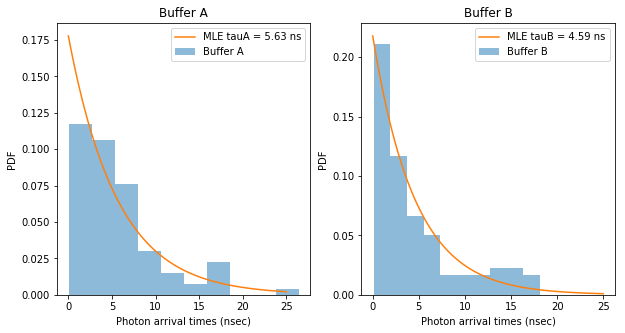

In [35]:
# A = Buffer A, B = Buffer B

_, tauA = st.expon.fit(arrival_times_in_buffer_A_nsec, floc=0)
_, tauB = st.expon.fit(arrival_times_in_buffer_B_nsec, floc=0)

print(f"MLEs: tauA = {tauA:.2f} ns,  tauB = {tauB:.2f} ns")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(arrival_times_in_buffer_A_nsec, density=True, alpha=0.5, label='Buffer A')
t = np.linspace(0, 25, 100)
ax[0].plot(t, st.expon.pdf(t, 0, tauA), label=f"MLE tauA = {tauA:.2f} ns")
ax[0].set_xlabel('Photon arrival times (nsec)')
ax[0].set_ylabel('PDF')
ax[0].set_title('Buffer A')
ax[0].legend()
ax[1].hist(arrival_times_in_buffer_B_nsec, density=True, alpha=0.5, label='Buffer B')
ax[1].plot(t, st.expon.pdf(t, 0, tauB), label=f"MLE tauB = {tauB:.2f} ns")
ax[1].set_xlabel('Photon arrival times (nsec)')
ax[1].set_ylabel('PDF')
ax[1].set_title('Buffer B')
ax[1].legend();

### 1c. (1 pt) Formulate a null and alternative hypothesis based on the posed question.

$H_0$: Arrival times do not depend on choice of buffer A versus B.

$H_a$: Arrival times do depend on choice of buffer A versus B.

### 1d. (5 pts) Perform a permutation test to determine a p-value for your null hypothesis. Plot the permuted parameter differences overlaid with a line indicating the difference between the maximum likelihood estimates from the original data. What does the p-value mean?

p-value = 0.119


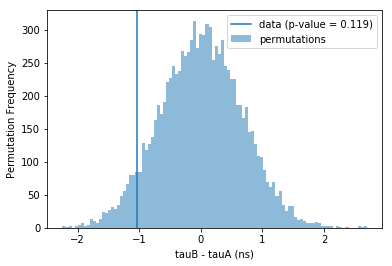

In [41]:
num_permutations = 10000
ptauA = np.zeros((num_permutations,))
ptauB = np.zeros((num_permutations,))
nA = len(arrival_times_in_buffer_A_nsec)
nB = len(arrival_times_in_buffer_B_nsec)
alldata = np.zeros((nA + nB,))
alldata[:nA] = arrival_times_in_buffer_A_nsec
alldata[-nB:] = arrival_times_in_buffer_B_nsec
for i in range(num_permutations):
    np.random.shuffle(alldata)
    A = alldata[:nA]
    B = alldata[-nB:]
    _, ptauA[i] = st.expon.fit(A, floc=0)
    _, ptauB[i] = st.expon.fit(B, floc=0)

pvalue = (np.abs(ptauB - ptauA) > np.abs(tauB - tauA)).sum() / num_permutations
print(f"p-value = {pvalue:.3f}")

plt.hist(ptauB - ptauA, bins=100, alpha=0.5, label='permutations')
plt.axvline(tauB - tauA, label=f'data (p-value = {pvalue:.3f})')
plt.xlabel('tauB - tauA (ns)')
plt.ylabel('Permutation Frequency')
plt.legend();

p-value is the probability of observing the data if $H_0$ is true (i.e. photon arrival times do not depend on buffer A versus B).

### 1e. (1 pt) Choose whether or not to reject your null hypothesis and interpret your result to answer the posed question. Use your intuition to decide if a significant effect is sizeable enough to be relevant.

Do not reject $H_0$ because p-value is greater than 0.05. Thus, it is not that unlikely that photon arrival times in buffers A and B come from the same distribution, i.e. the buffers do not have an obvious differential effect on the arrival times.

---
## 2. (6 pts for a-d) Subjects are tested on a cognitive task both before and after consumption of a moderate dose of alcohol. Task scores for each subject are collected in both conditions. Does alcohol consumption affect task performance? Answer using a-d below.

In [43]:
# The ith element in each array corresponds to subject i.
task_scores_control = np.array([54.35374938, 53.18859998, 56.03683009, 45.19010369, 57.29239596,
        46.00667416, 47.74492498, 43.57911739, 52.73242467, 54.51094403,
        56.32413779, 45.6510924 , 42.99301253, 47.87675615, 50.59210406])
task_scores_alcohol = np.array([41.37303309, 54.46704192, 40.21900672, 46.02831409, 41.09319302,
       38.82110261, 43.12841369, 44.67726883, 37.68849138, 44.07664277,
       47.14189376, 49.63305174, 39.17826357, 50.49531828, 37.79983866])

### 2a. (2 pts) Plot both data sets overlaid. Assuming task scores are normally distributed, what test might you perform to answer the posed question? Why might your choice not involve bootstrapping?

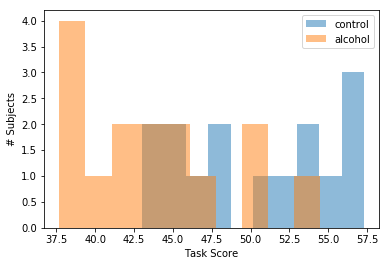

In [45]:
plt.hist(task_scores_control, alpha=0.5, label='control')
plt.hist(task_scores_alcohol, alpha=0.5, label='alcohol')
plt.xlabel('Task Score')
plt.ylabel('# Subjects')
plt.legend();

Assuming normal distributions, the data look more or less similarly variable, so a $t$-test for two paired samples should be appropriate. Bootstrapping might not be a good choice due to the small number of samples.

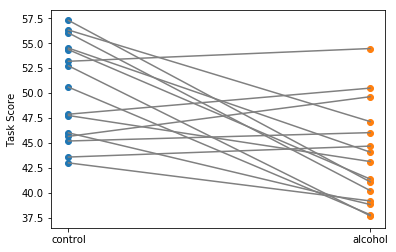

In [55]:
plt.scatter(np.zeros(task_scores_control.shape), task_scores_control, label='control')
plt.scatter(np.ones(task_scores_alcohol.shape), task_scores_alcohol, label='alcohol')
for i in range(len(task_scores_control)):
    plt.plot([0, 1], [task_scores_control[i], task_scores_alcohol[i]], '-', color='gray')
plt.xticks([0, 1], ['control', 'alcohol'])
plt.ylabel('Task Score');

### 2b. (1 pt) Formulate a null and alternative hypothesis based on the posed question.

$H_0$: Alcohol consumption does not affect task performance.

$H_a$: Alcohol consumption does affect task performance.

### 2c. (2 pts) Perform the chosen test to obtain a p-value for your null hypothesis. What does the p-value mean?

In [47]:
t, pvalue = st.ttest_rel(task_scores_control, task_scores_alcohol)

print(f"p-value = {pvalue:.3f}")

p-value = 0.004


p-value is the probability of observing the data if $H_0$ is true (i.e. alcohol does not affect task performance).

### 2d. (1 pt) Choose whether or not to reject your null hypothesis and interpret your result to answer the posed question. Use your intuition to decide if a significant effect is sizeable enough to be relevant.

Reject $H_0$ because p-value is less than 0.05. Thus, it is very unlikely that alcohol does not affect task performance. Effect is likely to be relevant as there is a strong trend for alcohol to reduce an individual's task score by about 10%.

---
## 3. (12 pts for a-f) You measure a cell's resting membrane voltage over time both before and after perfusing the cell with an experimental compound. Assuming that your voltage measurements are not temporally correlated, did the comound affect the variability of the cell membrane's resting voltage? Answer using a-f below.

In [56]:
# membrane voltages (mV) at each time point in a recording in each condition
voltage_control = np.array([-69.25860908, -70.97505084, -68.87984877, -69.57624106,
        -61.33868196, -77.90457063, -72.80182491, -71.88484958,
        -81.72715828, -66.81502239, -82.86569251, -80.95476203,
        -76.12496598, -76.24464879, -75.63959025, -69.02609889,
        -70.97761827, -74.87090655, -68.50591819, -84.5735021 ,
        -77.29993805, -75.13156687, -80.97521288, -72.64398409,
        -78.77410304, -73.35631639, -71.08992873, -73.01046214,
        -75.36769614, -64.90249042, -74.84917243, -70.36383237,
        -76.43843554, -75.27927882, -83.35011803, -87.31137124,
        -76.35119464, -74.0596694 , -74.61450753, -75.73971566,
        -69.92328242, -83.21213303, -75.33126327, -73.16811896,
        -80.39302407, -82.95349627, -66.94785965, -74.58557736,
        -64.44839082, -75.83133766, -81.38704175, -74.96337494,
        -74.91675426, -76.68595287, -71.81873265, -83.2200572 ,
        -76.9437347 , -77.57904265, -76.74889739, -70.79595765,
        -74.71485965, -81.3952969 , -73.14016631, -68.19670003,
        -73.63746994, -77.24003462, -83.32213578, -71.20774774,
        -82.7188499 , -80.88619041, -76.98439679, -73.47802169,
        -69.62462534, -77.92687972, -73.39596395, -73.76715385,
        -79.94890455, -72.51616499, -72.44399466, -72.62952502,
        -69.77413699, -73.21870855, -73.83197833, -67.95527759,
        -70.70348628, -81.46152755, -69.77537236, -72.77491227,
        -78.4313962 , -65.79106462, -67.04801876, -73.31173531,
        -78.47623769, -66.74507135, -77.21719378, -81.05368718,
        -77.22193129, -85.37706064, -74.09507036, -79.38727231,
        -74.31916614, -74.21512456, -76.70980065, -73.17397701,
        -71.27728436, -76.23335564, -69.17462543, -72.78495823,
        -67.46494572, -71.66822342, -71.19109798, -77.39434192,
        -75.32314572, -68.45501967, -76.47019369, -67.0486661 ,
        -80.3244956 , -71.85300948, -76.91027157, -68.20971912])
voltage_compound = np.array([-63.97957093, -69.87913537, -80.07493435, -75.28392946,
        -65.22132212, -85.17835853, -72.30718684, -71.22472093,
        -64.30509045, -86.51165455, -63.55594944, -48.73248405,
        -76.39846263, -68.01645065, -73.87558378, -74.98143332,
        -78.29493426, -71.20892308, -59.11543669, -76.3888619 ,
        -73.96297877, -59.05635223, -73.53383488, -74.53189952,
        -58.7412092 , -70.36796536, -79.18977119, -70.76364863,
        -82.06576563, -79.42933589, -81.23108916, -77.92949634,
        -68.44320742, -89.43349013, -70.22935154, -70.88839597,
        -64.61653922, -65.62712889, -56.67027194, -62.89361175,
        -74.94751396, -76.04331405, -93.00271998, -70.60974395,
        -64.71088628, -60.07909489, -73.39172946, -78.04311181,
        -83.03605248, -73.21317998, -66.51954764, -81.8852674 ,
        -74.36410817, -81.47570994, -70.52429574, -56.52200208,
        -76.02834121, -61.78523668, -81.4178707 , -63.96205723,
        -70.80501354, -58.94532787, -74.03875112, -70.33872742,
        -59.61041113, -74.72288588, -54.22304414, -60.82619926,
        -77.7329236 , -62.90439439, -71.461766  , -66.84164427,
        -70.02191482, -74.57892876, -54.65665236, -51.58300547,
        -71.82512266, -68.61442164, -68.89709644, -79.36458941,
        -62.55400698, -67.23244021, -52.38968736, -68.08846332,
        -60.15315045, -57.45908535, -55.1743901 , -82.37598912,
        -63.25064145, -60.93675073, -71.19684816, -70.39807313,
        -68.55518539, -84.03567375, -75.17837426, -49.4455262 ,
        -63.73159971, -69.70636325, -64.25290334, -74.15501481,
        -63.76455967, -63.75953839, -72.92791537, -73.07355528,
        -62.56956474, -56.57808167, -76.68326944, -70.88893983,
        -68.30133427, -77.42459202, -64.48945735, -63.57227534,
        -61.1152116 , -70.72614878, -67.50603139, -81.89596916,
        -62.47402279, -59.71609577, -65.01384041, -67.87027089,
        -81.2164933 , -69.70028185, -76.00137519, -44.39327577,
        -69.37597915, -79.42662221, -80.47729745, -63.9257965 ,
        -60.21447957, -88.83942483, -68.54681424, -62.26321956,
        -66.16886455, -45.82709816, -94.02765695, -69.89210494,
        -77.8616572 , -79.43619587, -75.70362571, -74.75574654,
        -65.05094325, -54.39097696, -72.41745134, -78.05349768,
        -61.95711745, -65.75650011, -50.8287177 , -62.82313143,
        -72.77982464, -50.50777155])

### 3a. (1 pt) What probability distribution is most likely to describe the measured membrane voltages and what parameter(s) from the distribution will you use to describe the data?

distribution = normal

parameters = mean ($\mu$) and standard deviation ($\sigma$)

### 3b. (3 pts) Compute the maximum likelihood estimate of the above parameter(s) for each data set (buffer A and B). Plot the data overlaid with the maximum likelihood estimate of the chosen distribution (plot data sets for buffers A and B side-by-side).

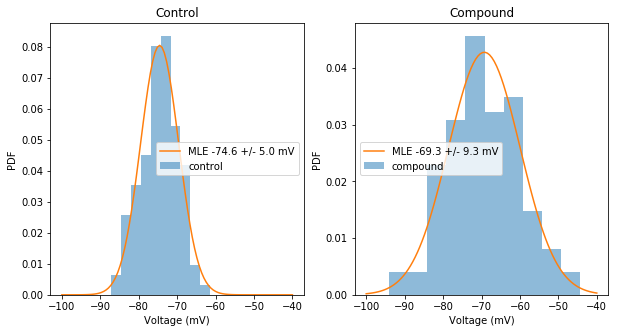

In [63]:
# A = control, B = compound

muA, sigmaA = st.norm.fit(voltage_control)
muB, sigmaB = st.norm.fit(voltage_compound)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(voltage_control, density=True, alpha=0.5, label='control')
V = np.linspace(-100, -40, 100)
ax[0].plot(V, st.norm.pdf(V, muA, sigmaA), label=f"MLE {muA:.1f} +/- {sigmaA:0.1f} mV")
ax[0].set_xlabel('Voltage (mV)')
ax[0].set_ylabel('PDF')
ax[0].set_title('Control')
ax[0].legend()
ax[1].hist(voltage_compound, density=True, alpha=0.5, label='compound')
ax[1].plot(V, st.norm.pdf(V, muB, sigmaB), label=f"MLE {muB:.1f} +/- {sigmaB:0.1f} mV")
ax[1].set_xlabel('Voltage (mV)')
ax[1].set_ylabel('PDF')
ax[1].set_title('Compound')
ax[1].legend();

### 3c. (1 pt) Which parameter addresses the posed question? Formulate a null and alternative hypothesis based on the posed question.

$\sigma$ is the parameter describing the variability of the membrane voltage.

$H_0$: The compound does not affect membrane voltage variability ($\sigma$).

$H_a$: The compound does affect membrane voltage variability ($\sigma$).

### 3d. (5 pts) Use the bootstrap approach to estimate confidence intervals for your test parameter in each condition. Plot the bootstrapped parameter distributions centered on the maximum likelihood estimates from the original data which should be indicated by a solid vertical line. Indicate the 95% confidence intervals either with dashed vertical lines or a shaded region. Starting from your bootstrapped parameter distribution in control conditions, use your MLE estimate of your parameter after addition of the compound to obtain a p-value for your null hypothesis. What does the p-value mean?

p-value = 0.000


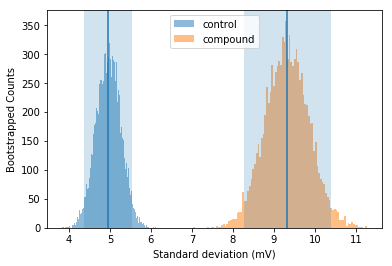

In [75]:
num_bootstraps = 10000
bsigmaA = np.zeros((num_bootstraps,))
bsigmaB = np.zeros((num_bootstraps,))
for i in range(num_bootstraps):
    bA = np.random.choice(voltage_control, size=voltage_control.shape, replace=True)
    bB = np.random.choice(voltage_compound, size=voltage_compound.shape, replace=True)
    _, bsigmaA[i] = st.norm.fit(bA)
    _, bsigmaB[i] = st.norm.fit(bB)

# shift bootstraped sigma distributions so their mean falls on the MLE estimates from the actual data
bsigmaA += (sigmaA - bsigmaA.mean())
bsigmaB += (sigmaB - bsigmaB.mean())

# 95% confidence intervals
bsigmaAci = np.quantile(bsigmaA, [0.025, 0.975])
bsigmaBci = np.quantile(bsigmaB, [0.025, 0.975])

plt.hist(bsigmaA, bins=100, alpha=0.5, label='control')
plt.axvline(sigmaA)
plt.axvspan(bsigmaAci[0], bsigmaAci[1], alpha=0.2)
plt.hist(bsigmaB, bins=100, alpha=0.5, label='compound')
plt.axvline(sigmaB)
plt.axvspan(bsigmaBci[0], bsigmaBci[1], alpha=0.2)
plt.xlabel('Standard deviation (mV)')
plt.ylabel('Bootstrapped Counts')
plt.legend();

pvalue = 1 - st.percentileofscore(bsigmaA, sigmaB) / 100
print(f"p-value = {pvalue:.3f}")

p-value is the probability of observing the data if $H_0$ is true (i.e. the compound does not affect membrane voltage variability). In this case, the MLE sigma in the presence of the compound was larger than all of the bootstrapped sigmas in the control condition, so it is extremely unlikely to have observed this data if $H_0$ is indeed true.

### 3e. (1 pt) Choose whether or not to reject your null hypothesis and interpret your result to answer the posed question. Use your intuition to decide if a significant effect is sizeable enough to be relevant.

Reject $H_0$ because p-value is much less than 0.05. Thus, it is extremely unlikely that the compound does not alter membrane voltage variability. The effect is robust, and seems highly relevant as it amounts to about a doubling of the membrane voltage fluctuations.

### 3f. (1 pt) Why was a t-test not appropriate for this question?

$t$-test is only appropriate for comparing means, not standard deviations.

---
## 4. (5 pts) You compare memory recall between male and female rats using a maze test (see recorded test results below). Does sex affect performance on the test? Plot the data, choose your test, formulate your null and alternative hypotheses, get a p-value and interpret your results in light of the posed question.

In [77]:
female_test_scores = np.array([136.35860777, 127.34983133, 112.38873686, 134.78114598,
         89.7881995 ,  98.27783411, 117.08128499, 111.27359853,
         82.03241067, 107.47949822, 106.4832149 , 127.52938595,
         97.09923057, 152.71076628, 146.46260421,  86.23298574,
        130.63728398, 156.27593179, 119.11032159, 104.61853491,
        154.89039782, 119.4884418 , 138.83894737, 100.53243725,
        155.27165152, 123.97668955, 115.70099864, 129.13243655,
        136.84755084, 119.01878925, 152.82251648, 139.51182909,
        113.05504606, 136.14440245, 125.32233436])
male_test_scores = np.array([121.47870366, 102.00202863, 128.81848931,  93.64881815,
        126.12695829, 126.80515141, 117.48756346,  99.33208983,
        156.404032  , 130.75770621,  99.73389766,  68.9682035 ,
         79.43956632, 101.14968398, 128.75766738, 101.26052916,
        115.22869646, 143.3269616 , 193.13324141, 117.82623189,
        127.46642741, 107.53897989, 127.74803905,  92.28407709,
        157.24124022, 133.82830041, 115.10351631, 129.99621096,
        116.99747288, 131.277477  ])

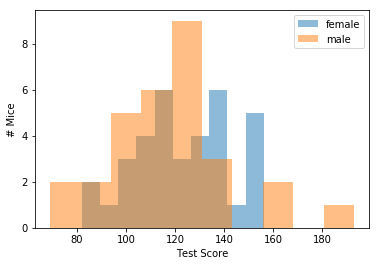

In [78]:
plt.hist(female_test_scores, alpha=0.5, label='female')
plt.hist(male_test_scores, alpha=0.5, label='male')
plt.xlabel('Test Score')
plt.ylabel('# Mice')
plt.legend();

The data look more or less normal with similar variances and there are no obvious reasons to suspect a non-normally distributed data, so a $t$-test for two independent samples seems appropriate.

$H_0$: Sex does not affect mean test performance.

$H_a$: Sex does affect mean test performance.

In [79]:
t, pvalue = st.ttest_ind(female_test_scores, male_test_scores)

print(f"p-value = {pvalue:.3f}")

p-value = 0.557


Do not reject $H_0$ because p-value is greater than 0.05. Thus, it is not very unlikely to observe the recorded test scores if sex has no influence on the results.

---
## 5. (6 pts for a-c) In a voltage-clamp experiment you apply a depolarizing voltage step to a cell and record the resulting current through voltage-gated ion channels expressed in the cell's membrane. Assume that the channels switch between only two states (closed or open), and that during the voltage step channels primarily go from closed to open and not the reverse. Based on your recorded current in response to the voltage step (see below), estimate the rate constant for channel opening. Hint: assume the simplest possible function describing the observed data curve. Answer using a-c below.

In [84]:
# Recorded current (pA) immediately following the depolarizing voltage step.
# Sample rate is 1 kHz (i.e. 1 ms between samples).
current_pA = np.array([  7.40400954,  11.75399867,  15.25974887,  16.55741034,
        16.23616197,  27.91332059,  30.89455318,  13.94250182,
        39.14475277,  38.62833365,  27.95991771,  45.96599515,
        34.55074632,  52.02096881,  64.29899184,  48.50465167,
        49.01158336,  73.34775865,  78.72381002,  63.92741468,
        88.86032817,  77.03855853,  73.60822615,  88.78156785,
        83.85215198,  85.42960988,  81.60007344,  93.76331141,
        83.26766148,  99.66059335,  99.89333935,  77.12838597,
       101.15350316, 112.76826583, 105.37765405, 115.63858388,
       103.67971522, 116.28718369, 107.12977487, 126.83298578,
       113.94662793, 116.81751269, 115.7432912 , 112.15219806,
       112.2757278 , 129.48277742, 110.82710425, 131.71928153,
       114.52989675, 122.7509432 , 118.43386614, 120.72716773,
       131.2722474 , 133.90063319, 124.12788868, 132.08506868,
       141.99426324, 125.28628869, 133.86166195, 137.6496554 ,
       127.05105   , 108.46011482, 123.56950851, 143.91433909,
       146.83077045, 137.33185104, 122.88863633, 129.15256327,
       160.4841877 , 150.56483672, 133.54208021, 141.78995279,
       142.52309547, 118.54607073, 137.12214617, 155.96236894,
       137.16835737, 132.83148888, 136.96742077, 137.39070476,
       144.82567773, 142.39886446, 141.57184264, 141.59309188,
       142.38216919, 130.6978379 , 125.15639336, 158.97016834,
       127.25677513, 153.41843542, 152.16377783, 142.75119879,
       151.42916003, 149.23131014, 114.68812064, 142.95819338,
       141.33220605, 144.52594581, 154.6319818 , 148.91654436])

### 5a. (2 pts) Write a function that describes the data with unknown parameters as arguments to the function.

In [95]:
def exponential_rise(time, amp, tau):
    return amp * (1 - np.exp(-time / tau))

### 5b. (3 pts) Find optimized parameters for the above function based on the data. Plot the data with your optimized function overlaid.

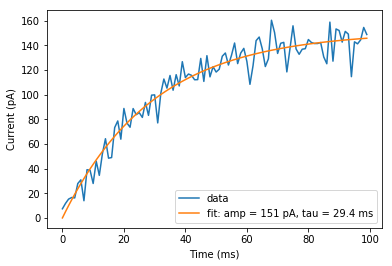

In [100]:
time_ms = np.arange(len(current_pA))
result = opt.curve_fit(exponential_rise, time_ms, current_pA)
amp, tau = result[0]

plt.plot(time_ms, current_pA, label='data')
plt.plot(time_ms, exponential_rise(time_ms, amp, tau), label=f'fit: amp = {amp:.0f} pA, tau = {tau:.1f} ms')
plt.xlabel('Time (ms)')
plt.ylabel('Current (pA)')
plt.legend();

### 5c. (1 pt) Estimate the rate constant of channel opening based on your results.

In [132]:
print(f"Estimate of rate constant for channel opening is {1000/tau:.2f} per second.")

Estimate of rate constant for channel opening is 33.98 per second.


---
## 6. (10 pts for a-c) You record the steady state firing rate of a neuron (i.e. number of spikes per minute, see below). Compute parameter(s) that best describe the spiking behaviour of the neuron. Answer using a-c below.

In [112]:
num_spikes_per_minute = np.array([10,  9, 19,  7,  9, 11, 14, 14, 13, 19, 10,  7, 10, 12, 11,  8, 14,
       11, 14,  8,  8, 11,  8, 20,  9,  6, 12, 13,  9, 19, 13, 14, 12, 14,
        6, 16, 10, 16, 15, 12, 20, 17, 11, 15, 18,  7,  9, 10, 10, 13, 10,
       14, 12, 11, 11, 20, 14, 13, 12, 10, 17, 11, 13,  7, 17, 11, 12, 10,
        3, 11,  9, 16, 10,  8, 13,  8, 12, 10, 14, 11, 13, 10, 11, 12,  8,
       15, 13, 11, 12,  8, 14, 13, 17, 10, 10, 16, 19, 15, 11, 11], dtype=int)

### 6a. (2 pts) What model distribution and associated parameter(s) most likely describe the data?

distribution = poisson

parameter = average number of spikes per minute ($\mu$)

### 6b. (4 pts) Write a cost function that returns the sum of negative loglikelihoods of the data for your chosen model distribution with model parameters as unknown arguments.

In [113]:
def cost(params):
    mu = params
    return -st.poisson.logpmf(num_spikes_per_minute, mu).sum()

### 6c. (4 pts) Find optimized model parameters to your chosen model distribution by minimizing the cost function. Plot the data overlaid with your optimized model.

MLE: mu = 12.0 spikes per minute


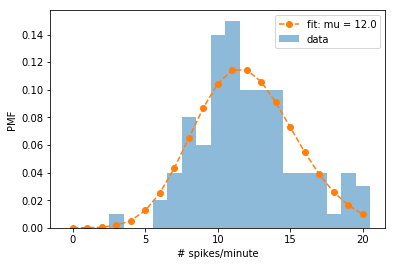

In [143]:
result = opt.minimize(cost, [10])
mu = result.x[0]
print(f"MLE: mu = {mu:.1f} spikes per minute")

bins = np.arange(num_spikes_per_minute.max() + 1)
binedges = np.arange(num_spikes_per_minute.max() + 2) - 0.5
plt.hist(num_spikes_per_minute, bins=binedges, density=True, alpha=0.5, label='data')
plt.plot(bins, st.poisson.pmf(bins, mu), 'o--', label=f'fit: mu = {mu:.1f}')
plt.xlabel('# spikes/minute')
plt.ylabel('PMF')
plt.legend();